# Ensemble Methods

In [2]:
# Evelina Ramoskaite

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn

In [4]:
# Importing Data

In [5]:
data = pd.read_csv('data/aviation_data.csv', index_col='id')
data = data.drop(data.columns[0], axis=1) # dropping an index column

In [6]:
# 80/20 split
X_train = np.load('data/X_train_s.npy')   # X values have been standardized
X_test = np.load('data/X_test_s.npy')
y_train = np.load('data/y_train.npy')
y_test = np.load('data/y_test.npy')

# Boosting - XG Boost, Adaboost,CatBoost

### Hyperparameter Tuning
We used a 5-fold validated random grid search

#### Initializing Grid Search

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [51]:
def modelOptimization(clf,grid,x,y):
        #Input is the classifier,grid,x,and y.
        #performs Random Grid Search Using 5-fold Cross Validation
        #outputs the best model and accuracy
        clfmodel = RandomizedSearchCV(estimator = clf,n_iter=200,param_distributions = grid,scoring='accuracy', cv=5,verbose =1, random_state=2021,n_jobs=-1)
        clfmodel.fit(x,y)
        print('Model Best Score: \n',clfmodel.best_score_)
        print('Model Best Parameters: \n',clfmodel.best_params_)

### XG Boost

In [8]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [56]:
# XG Boost gridsearch

# Training


gb = xgb.XGBClassifier()

# Grid
gbgrid = {'n_estimators': [int(x) for x in np.linspace(start = 5, stop = 101, num = 25)],    # optimizing number of trees and tree depth
               'max_depth': [9,10,11,12,None],
              'subsample':[i/10 for i in range (7,11)],
               'colsample_bytree': [i/10 for i in range (7,11)],
                 'alpha:': [0.5,1,5]}
modelOptimization(gb,gbgrid,X_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


C:\Users\Edvinas\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:39:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { alpha: } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:39:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Best Score: 
 0.9640598838055927
Model Best Parameters: 
 {'subsample': 1.0, 'n_estimators': 33, 'max_depth': 9, 'colsample_bytree': 0.9, 'alpha:': 5}


### AdaBoost

In [9]:
from sklearn.ensemble import AdaBoostClassifier

In [16]:
# AdaBoost random gridsearch

ada = AdaBoostClassifier()
# Grid
adagrid = {   # optimizing number of trees and tree depth
               'n_estimators': [int(x) for x in np.linspace(start = 5, stop = 101, num = 25)],
                'learning_rate':[0.001,0.1,0.5,1,2,3],
                'algorithm':['SAMME','SAMME.R']}
modelOptimization(ada,adagrid,X_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


C:\Users\Edvinas\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.87314293 0.87216791        nan 0.78702372        nan 0.78702372
 0.89893715 0.85271603 0.89133017 0.78702372 0.78702372 0.89324159
 0.90541467 0.78702372 0.90198771 0.92260763 0.78702372 0.78702372
        nan 0.87185898 0.91594668 0.78702372        nan 0.78702372
 0.78702372 0.92463486 0.85513906 0.78702372 0.88074986 0.78702372
 0.78702372        nan 0.92661385 0.78702372 0.78702372 0.78702372
 0.91538678        nan 0.92378535 0.78702372 0.78702372 0.78702372
 0.78702372 0.88921605 0.78702372 0.92928787 0.87463921 0.78702372
 0.78702372        nan 0.87143425 0.78702372 0.78702372 0.88396446
 0.78702372 0.78702372 0.8863393  0.87345181 0.78702372 0.78702372
 0.78702372 0.92672968 0.78702372 0.78702372 0.9222987  0.78702372
 0.78702372 0.78702372 0.915464   0.9188524  0.88589531 0.89701611
 0.78702372 0.92864107 0.78702372 0.92807152 0.9196

Model Best Score: 
 0.9293071721295654
Model Best Parameters: 
 {'n_estimators': 93, 'learning_rate': 1, 'algorithm': 'SAMME.R'}


### CatBoost

In [10]:
import catboost as cb

In [18]:
#catboost random gridsearch

CATBoost = cb. CatBoostClassifier()
# Grid
catgrid =    {'learning_rate': [0.01,0.02,0.03,0.04],
        'depth': [4, 6,7,8,9,10,15,20],
        'l2_leaf_reg': [0,0.5,1, 3],
        'iterations': [10, 20,30,40,50,60,70,80,90, 100,150]}

modelOptimization(CATBoost,catgrid,X_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


C:\Users\Edvinas\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.93657631 0.95666529 0.94821847        nan 0.96246707 0.94845016
 0.95178062 0.93763821 0.9430345  0.94888456        nan 0.95426157
 0.958596   0.94107486 0.95831604 0.95570959 0.96233192 0.96317177
 0.95276528 0.94957962 0.95167439 0.9173078  0.91732715 0.95558409
 0.94990784        nan 0.94244567 0.9442026  0.94536101 0.94955065
 0.93712656        nan        nan 0.95561306 0.95561307 0.94378749
 0.95415538 0.95146205        nan 0.94518726 0.95259151        nan
 0.94711796        nan 0.94449222 0.94891352 0.93005053        nan
 0.94587266 0.95034224 0.9417506  0.95659773 0.94522587 0.95663634
 0.95122071 0.94265804 0.94118104 0.95182889 0.95746654        nan
 0.95611505 0.8855477  0.96154998 0.89338638 0.8855477  0.94883629
 0.9594069  0.95618262 0.94446326 0.95511109 0.95106626 0.93845876
 0.95892423 0.950265   0.9617141  0.96377995 0.9378

0:	learn: 0.6169770	total: 113ms	remaining: 16.8s
1:	learn: 0.5333182	total: 164ms	remaining: 12.2s
2:	learn: 0.4662597	total: 221ms	remaining: 10.8s
3:	learn: 0.4243581	total: 276ms	remaining: 10.1s
4:	learn: 0.3885085	total: 333ms	remaining: 9.64s
5:	learn: 0.3459653	total: 387ms	remaining: 9.3s
6:	learn: 0.3127338	total: 442ms	remaining: 9.04s
7:	learn: 0.2860257	total: 502ms	remaining: 8.9s
8:	learn: 0.2629254	total: 562ms	remaining: 8.8s
9:	learn: 0.2476565	total: 618ms	remaining: 8.65s
10:	learn: 0.2288488	total: 676ms	remaining: 8.54s
11:	learn: 0.2152729	total: 731ms	remaining: 8.4s
12:	learn: 0.2061652	total: 789ms	remaining: 8.32s
13:	learn: 0.1986240	total: 846ms	remaining: 8.22s
14:	learn: 0.1872202	total: 900ms	remaining: 8.1s
15:	learn: 0.1800384	total: 960ms	remaining: 8.04s
16:	learn: 0.1743572	total: 1.02s	remaining: 7.98s
17:	learn: 0.1697610	total: 1.07s	remaining: 7.89s
18:	learn: 0.1653433	total: 1.13s	remaining: 7.8s
19:	learn: 0.1604583	total: 1.19s	remaining: 7.

### Tuned Models 

In [21]:

# Best CatBoost Model
bestCat =  cb.CatBoostClassifier(learning_rate= 0.04, l2_leaf_reg= 1, iterations= 150, depth= 10)
# Best Adaboost Model
bestAda = AdaBoostClassifier(n_estimators= 97, learning_rate= 1, algorithm= 'SAMME.R')
# Best XGBoost Model
bestXGB = xgb.XGBClassifier(subsample= 1.0, n_estimators= 33,max_depth= 9, colsample_bytree= 0.9, alpha= 5,eval_metric='logloss')
# another tuned xgb model I experimented with
bestXGB1 = xgb.XGBClassifier(min_samples_split=45, 
                                 min_samples_leaf=9, 
                                 max_leaf_nodes=190, 
                                 max_depth=20, 
                                 criterion='entropy', 
                                 class_weight=None,eval_matric='logloss')

## Evaluation of Boosted models on the test set 

In [12]:
>>> from sklearn import datasets, linear_model,metrics
>>> from sklearn.model_selection import cross_validate
>>> from sklearn.metrics import make_scorer
>>> from sklearn.metrics import confusion_matrix, accuracy_score,precision_recall_curve
import seaborn as sns


#### Evaluation Functions

In [13]:
def fit_predict_score(clf):
    """Predicts the average accuracy score of a classifier clf and outputs a confusion matrix."""
    clf.fit(X_train, np.ravel(y_train)) # fitting the model to the training data
    predicted = clf.predict(X_test) #getting predicted values
    
    #cross tabulation of predicted and actual values produces the correlation matrix
    confusion_matrix =  pd.crosstab(index=np.ravel(y_test), columns=predicted.ravel(), rownames=['Expected'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
    accuracy = np.round(metrics.accuracy_score(y_test , predicted),4)
    plt.title(clf , fontsize = 12)
    plt.suptitle("Confusion Matrix")
    plt.show()
    print("Accuracy Score: ",accuracy)
    print (metrics.classification_report(y_test,predicted))

In [14]:
def roccurve(clf):
    """Outputs a ROC curve for a given classifier"""
# crea`ting roc curve
    predicted = clf.predict(X_test) #getting y hat
    fpr,tpr,_ = metrics.roc_curve(y_test,predicted)  #comparing y hat and the actuall y 
    #plotting
    plt.title('ROC Curve')
    plt.plot(fpr,tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [15]:
def prcurve(clf):
    """Outputs a Precision Recall Curve for a given classifier"""
    predicted = clf.predict(X_test)
    precision,recall,_ = precision_recall_curve(y_test,predicted)
    #plotting
    plt.plot(recall,precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title("Precision Recall Curve")
    plt.show()

In [17]:
def metrics_report(model):
        """Shows the confusion matrix, roc, and pc curves for a model."""
        fit_predict_score(model)
        roccurve(model)
        prcurve(model)

#### Evaluation Results

#### AdaBoost

When applied to the test set, the optimized AdaBoost model had an accuracy rate of 92.7%, with weighted average precision,recall, and f-1 scores of 93%. It had the least accurate performance of the boosted models. 

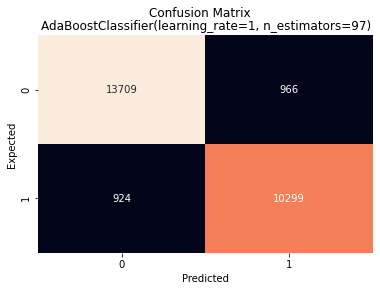

Accuracy Score:  0.927
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     14675
           1       0.91      0.92      0.92     11223

    accuracy                           0.93     25898
   macro avg       0.93      0.93      0.93     25898
weighted avg       0.93      0.93      0.93     25898



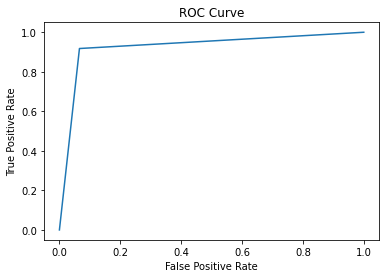

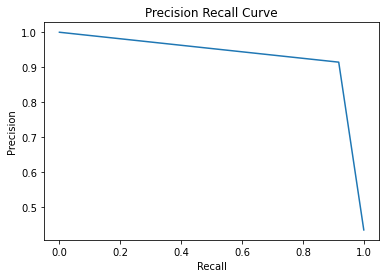

In [18]:
metrics_report(bestAda)

#### XGBoost

XGBoost was the best performing model, with an accuracy score of 96.21%. The weighted average precision,recall, and f-1 scores were all 96%. The ROC curve is well fit to the axis, showing overall good performance for the model. 

C:\Users\Edvinas\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


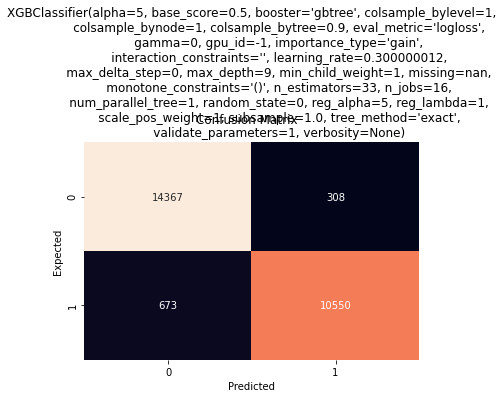

Accuracy Score:  0.9621
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14675
           1       0.97      0.94      0.96     11223

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898



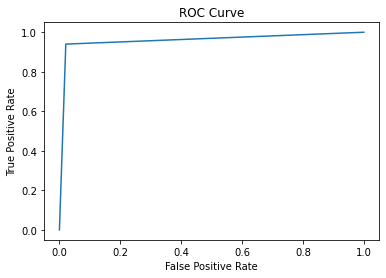

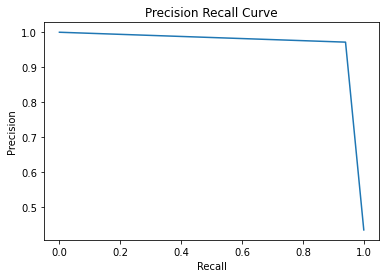

In [19]:
metrics_report(bestXGB)

### CatBoost

The tuned CatBoost model had an accuracy rate of 96.05 on the hold-out set, with 96% for weighted average precision,recall, and f1-score. 

0:	learn: 0.6169770	total: 110ms	remaining: 16.4s
1:	learn: 0.5333182	total: 164ms	remaining: 12.1s
2:	learn: 0.4662597	total: 219ms	remaining: 10.7s
3:	learn: 0.4243581	total: 273ms	remaining: 9.98s
4:	learn: 0.3885085	total: 330ms	remaining: 9.57s
5:	learn: 0.3459653	total: 385ms	remaining: 9.24s
6:	learn: 0.3127338	total: 440ms	remaining: 8.99s
7:	learn: 0.2860257	total: 492ms	remaining: 8.74s
8:	learn: 0.2629254	total: 548ms	remaining: 8.59s
9:	learn: 0.2476565	total: 603ms	remaining: 8.44s
10:	learn: 0.2288488	total: 656ms	remaining: 8.29s
11:	learn: 0.2152729	total: 711ms	remaining: 8.17s
12:	learn: 0.2061652	total: 771ms	remaining: 8.12s
13:	learn: 0.1986240	total: 827ms	remaining: 8.03s
14:	learn: 0.1872202	total: 881ms	remaining: 7.93s
15:	learn: 0.1800384	total: 940ms	remaining: 7.87s
16:	learn: 0.1743572	total: 999ms	remaining: 7.82s
17:	learn: 0.1697610	total: 1.05s	remaining: 7.73s
18:	learn: 0.1653433	total: 1.11s	remaining: 7.67s
19:	learn: 0.1604583	total: 1.17s	remaini

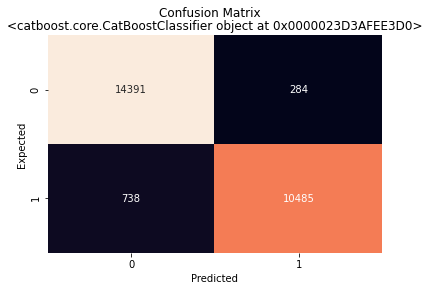

Accuracy Score:  0.9605
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     14675
           1       0.97      0.93      0.95     11223

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898



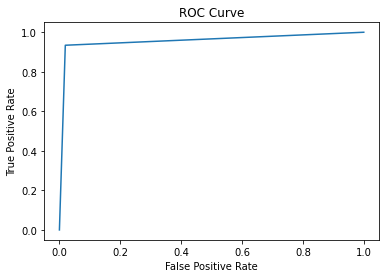

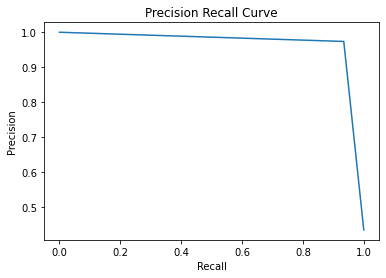

In [20]:
metrics_report(bestCat)

#### XG Boost had the best result out of the stacked models 

# Stacking 

In an attempt to maximize performance, we combined 4 of our best classifiers into a 2-layered stacked model. 

In [22]:
# Stacking our best performing models
# Best Decision Tree Model  
from sklearn import tree
from sklearn.linear_model import LogisticRegression
bestDT = tree.DecisionTreeClassifier(min_samples_split=45, 
                                 min_samples_leaf=9, 
                                 max_leaf_nodes=190, 
                                 max_depth=20, 
                                 criterion='entropy', 
                                 class_weight=None)
# best random forest 
from sklearn.ensemble import RandomForestClassifier
bestRF =rf = RandomForestClassifier( min_samples_split=13, 
                             min_samples_leaf=4, 
                             max_depth=25, 
                             criterion='entropy', 
                             class_weight=None,
                             n_estimators=50,
                             n_jobs=-1)

# best support vector classifier
from sklearn.svm import SVC
bestSVC=SVC(kernel='rbf')

#best logistic Regression
bestLogReg = LogisticRegression(
    C=100,
    tol=.01,
    class_weight=None,
    fit_intercept=False,
    l1_ratio=1.0,
    max_iter=1000,
    penalty='elasticnet',
    solver='saga'
)

### Stacking 4 of our best models

In [23]:

from sklearn.ensemble import StackingClassifier
# Creating 2 layers of estimation, with 2 learners in each.
# best gradient boost and support vector classifier
layer_one_estimators = [
                        ('rf_1', bestSVC),
                        ('gb_1',bestXGB )            
                       ]
#best decision tree and random forest
layer_two_estimators = [
                        ('svc_1',bestDT),
                        ('rf_1',bestRF)
                        
                       ]
# The final meta-estimator is logistic regression
layer_two = StackingClassifier(estimators=layer_two_estimators, final_estimator=LogisticRegression())

# stacking the models.
Stacked = StackingClassifier(estimators=layer_one_estimators, final_estimator=layer_two)


#### Evaluation of 2-layer stacked model 

The accuracy rate of the stacked model was 96.25%. Precision,recall, and the f-1 score were all 96%. It narrowly outperformed the XGBoost model, but was more computationally expensive.

C:\Users\Edvinas\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Edvinas\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Edvinas\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use 

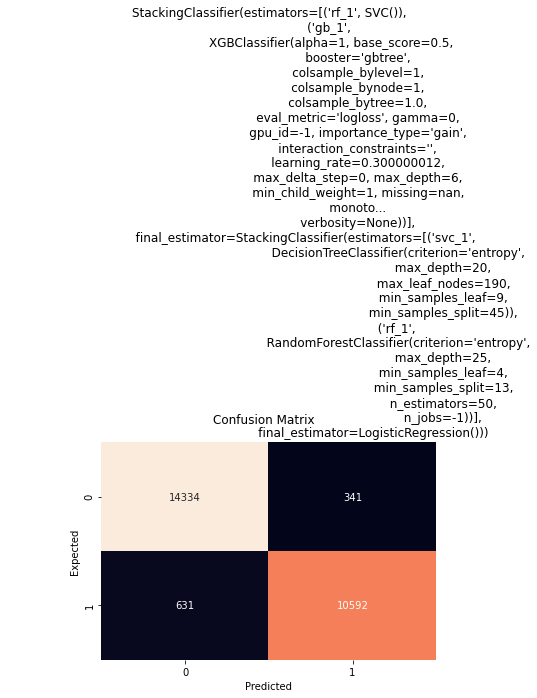

Accuracy Score:  0.9625
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14675
           1       0.97      0.94      0.96     11223

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898



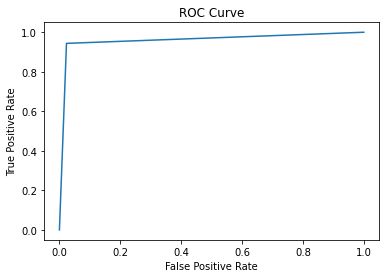

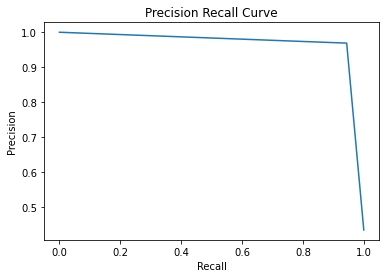

In [30]:
metrics_report(Stacked)

### the best stacked model does not significantly outperform our optimized XG boost or random forest models, which both had an accuracy rating of around 96%. The stacked model was more computationally expensive and yielded an accuracy rate of 96.26%.

### Stacking just SVC  and XG Boost

We attempted stacking just XGBoost and SVC because they were two of the most sucessful classifiers. The results did not outperform XGBoost. 

In [25]:
from sklearn.ensemble import StackingClassifier
# Creating 1 layers of estimation, with 2 learners.
# best gradient boost and Support vector machine classifier
layer_one_estimators = [
                        ('rf_1', bestSVC),
                        ('gb_1',bestXGB )            
                       ]

# The final meta-estimator is logistic regression

# stacking the models.
svcxgbStacked = StackingClassifier(estimators=layer_one_estimators, final_estimator=LogisticRegression())


#displaying accuracy
print("Accuracy Score: \n",svcxgbStacked.fit(X_train, y_train).score(X_test, y_test))

C:\Users\Edvinas\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Edvinas\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Edvinas\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use 

Accuracy Score: 
 0.9620047880145185


#### Evaluation of 1-layer stacked model 

C:\Users\Edvinas\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Edvinas\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Edvinas\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use 

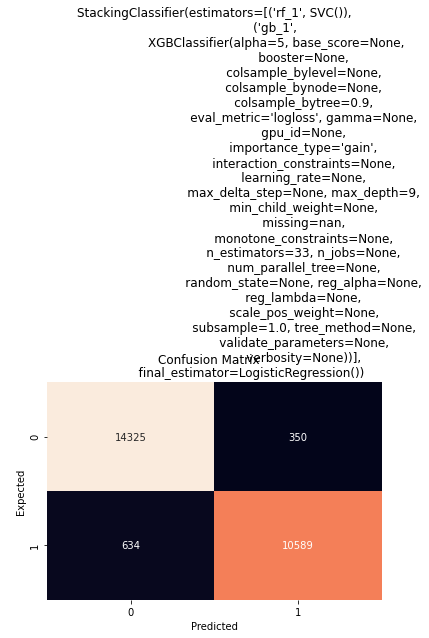

Accuracy Score:  0.962
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14675
           1       0.97      0.94      0.96     11223

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898



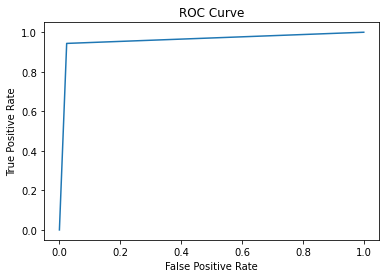

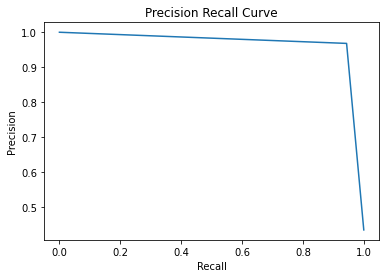

In [26]:
metrics_report(svcxgbStacked)